In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 'datetime' is used to perform date and time operations
import datetime as dt

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [3]:
df_college=pd.read_csv("College.csv")
df_college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df_college.shape

(777, 19)

In [6]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
df_college.describe(include=object)

,Unnamed: 0,Private
count,777,777
unique,777,2
top,Abilene Christian University,Yes
freq,1,565


In [8]:
# sorting variables on the basis of null values
# 'ascending = False' sorts values in the descending order
Total = df_college.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df_college.isnull().sum()*100/df_college.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
Unnamed: 0,0,0.0
Room.Board,0,0.0
Expend,0,0.0
perc.alumni,0,0.0
S.F.Ratio,0,0.0
Terminal,0,0.0
PhD,0,0.0
Personal,0,0.0
Books,0,0.0
Outstate,0,0.0


In [10]:
df_college.drop(columns=["Unnamed: 0"], axis=1, inplace=True)


In [12]:

df_numeric_features = df_college.select_dtypes(include=[np.number])

df_num = df_numeric_features.drop('Expend',axis=1)       

# head() to display top five rows
df_num.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,15


In [15]:
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-0.34688182 -0.32120545 -0.0635089  ...  1.01377594 -0.86757419
  -0.31825194]
 [-0.21088404 -0.03870299 -0.28858421 ... -0.4777045  -0.5445722
  -0.55126184]
 [-0.40686563 -0.37631793 -0.47812132 ... -0.30074919  0.58593475
  -0.66776679]
 ...
 [-0.23389507 -0.04237716 -0.0915087  ...  0.07844075 -0.22157022
  -0.95902917]
 [ 1.99171118  0.17725626  0.57833266 ... -2.09558159  2.12019418
   1.9535946 ]
 [-0.00326766 -0.06687159 -0.09581636 ...  1.01377594  0.42443375
   1.9535946 ]]


In [16]:
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0.54656564
   0.52542506 -0.29500852  0.41840277  0.47789622]]


In [17]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [5.00152848 4.35278651 1.13384452 1.00372817 0.93129732 0.78633659
 0.02337676 0.03724537 0.1018604  0.16956284 0.14527591 0.23756372
 0.40122291 0.52922123 0.58992563 0.57584221] 

Eigenvectors: 
 
 [[-3.41483631e-01 -2.37006432e-01 -8.98905410e-02 -2.72038519e-01
  -1.27957133e-02  2.33575474e-02  3.37679751e-01 -4.59692791e-01
  -1.31046599e-01 -6.03115307e-01  1.02280982e-01  5.39469347e-02
  -5.53475279e-02  9.84070757e-02 -6.83273496e-02 -8.58390964e-02]
 [-3.14886521e-01 -2.87718886e-01 -1.24122324e-01 -2.55827684e-01
  -6.41915207e-02  1.06789063e-02 -5.25636949e-01  5.31879916e-01
   2.25664010e-01 -2.52346147e-01  8.52197293e-02  1.06683883e-01
  -5.68385240e-02  1.84928194e-01 -4.20026557e-02 -3.66766191e-02]
 [-2.92466278e-01 -3.29429290e-01 -1.00798644e-01 -1.52512707e-01
   5.73959448e-02  3.36993446e-02  6.21989888e-01  3.85251353e-01
  -4.75486947e-02  4.35949178e-01 -1.16223327e-01 -5.85341439e-02
  -4.48519171e-02  1.31561677e-01  6.44311505e-02  9.00

In [18]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True)
print(eig_val)

[5.001528477428369, 4.352786512016736, 1.1338445217176722, 1.0037281671111427, 0.9312973169978386, 0.7863365872988596, 0.5899256292154538, 0.5758422099377182, 0.5292212298195726, 0.4012229112519115, 0.23756371756860112, 0.16956284134645577, 0.1452759058973726, 0.10186039729499775, 0.03724537048218981, 0.023376761316130684]


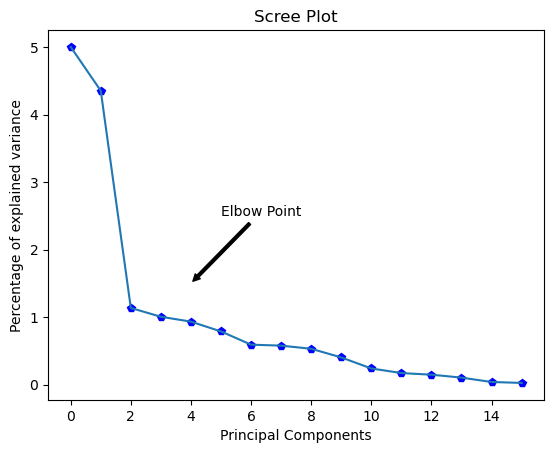

In [19]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text ='Elbow Point', xy=(4,1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

In [21]:
eigenvector = eig_vec[:,0:4]

eigenvector

array([[-0.34148363, -0.23700643, -0.08989054, -0.27203852],
       [-0.31488652, -0.28771889, -0.12412232, -0.25582768],
       [-0.29246628, -0.32942929, -0.10079864, -0.15251271],
       [-0.32672266,  0.19946844,  0.07404146,  0.02398342],
       [-0.33312444,  0.16521842,  0.04343036,  0.0729789 ],
       [-0.2750557 , -0.35025409, -0.07529031, -0.0924246 ],
       [-0.11420908, -0.29878753,  0.11568178,  0.17683029],
       [-0.21773675,  0.33926449,  0.04841567, -0.13042651],
       [-0.20639599,  0.21716265,  0.15541863, -0.19279291],
       [-0.0775749 , -0.03552395,  0.75468919, -0.20874337],
       [-0.01459637, -0.23403733,  0.49913744,  0.19512889],
       [-0.33758102,  0.05701541, -0.05301229,  0.53510513],
       [-0.33267673,  0.06783135,  0.01219836,  0.51215395],
       [ 0.09401126, -0.28844584, -0.23298331,  0.14791216],
       [-0.13635183,  0.31246688, -0.11045943, -0.02533907],
       [-0.20970392,  0.25787904, -0.15905701, -0.29083711]])

In [22]:
df_pca = pd.DataFrame(df_num_std.dot(eigenvector), columns= ['PC1','PC2','PC3','PC4'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4
0,1.220417,-1.167647,-0.050810,0.919475
1,2.444249,-0.282524,1.703368,-3.634691
2,1.698819,0.598535,-0.645870,-0.554051
3,-1.580740,3.100321,0.060672,1.392375
4,2.301981,-0.878186,2.178895,1.041419


In [23]:
df_pca.shape

(777, 4)

In [24]:
pca = PCA(n_components=4, random_state=0)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [25]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3','PC4'])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4
0,-1.220417,1.167647,-0.050810,-0.919474
1,-2.444249,0.282524,1.703368,3.634691
2,-1.698819,-0.598535,-0.645870,0.554051
3,1.580740,-3.100321,0.060673,-1.392374
4,-2.301981,0.878186,2.178895,-1.041420
